In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/capstor/scratch/cscs/ajayaraj/qtpyt-tests/gw_edmft/AuBDA14CH2/')

In [2]:
input_folder = "output/lowdin"
output_folder = "output/lowdin/ed"
os.makedirs(output_folder, exist_ok=True)

H_eff = np.load(f"{input_folder}/effective_hamiltonian.npy")
occupancy_goal = np.load(f"{input_folder}/occupancies.npy")
V = np.eye(H_eff.shape[0]) * 3.5
V_diag = np.diag(V.diagonal())

# === Initial double counting ===
DC0 = np.diag(V.diagonal() * (occupancy_goal - 0.5))
dc0_diag = DC0.diagonal()
dc0_diag

array([4.70857537, 1.76169727, 1.87142486, 1.79674205, 1.6759644 ,
       1.83664782, 1.75520337, 1.68891043, 4.51998783])

In [3]:
occupancy_goal

array([1.84530725, 1.00334208, 1.03469282, 1.01335487, 0.97884697,
       1.02475652, 1.00148668, 0.98254584, 1.79142509])

In [7]:
dcc = np.load('output/lowdin/ed/ed_dcc_diag.npy')
print("Double counting correction (DCC):", dcc)

Double counting correction (DCC): [3.35507197 1.800339   1.82477866 1.82039564 1.77310606 1.84386624
 1.74902242 1.77336104 3.30508322]


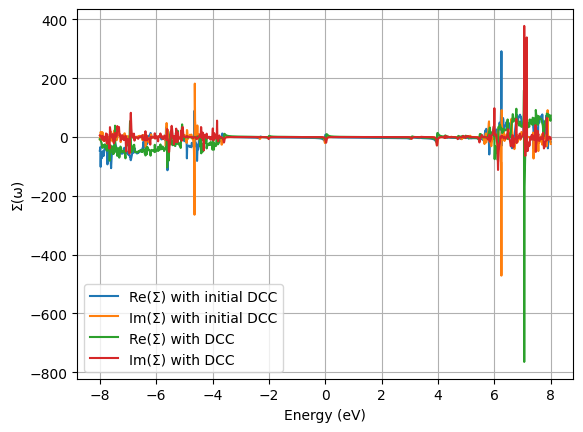

In [8]:
ed_self_energy_initial_dcc = np.load('output/lowdin/ed/sigma_initial.npy')
self_energy_with_dcc = np.load('output/lowdin/ed/self_energy_with_dcc.npy')
de = 0.01
energies = np.arange(-8, 8 + de / 2.0, de).round(7)
trace_ed_self_energy_initial_dcc = np.trace(ed_self_energy_initial_dcc, axis1=1, axis2=2)
trace_ed_self_energy_with_dcc = np.trace(self_energy_with_dcc, axis1=1, axis2=2)
plt.plot(energies,trace_ed_self_energy_initial_dcc.real, label='Re(Σ) with initial DCC')
plt.plot(energies, trace_ed_self_energy_initial_dcc.imag, label='Im(Σ) with initial DCC')
plt.plot(energies,trace_ed_self_energy_with_dcc.real, label='Re(Σ) with DCC')
plt.plot(energies, trace_ed_self_energy_with_dcc.imag, label='Im(Σ) with DCC')
plt.xlabel('Energy (eV)')
plt.ylabel('Σ(ω)')
plt.legend()
plt.grid()
# plt.xlim(-3,3)
# plt.ylim(-5,5)
plt.show()

In [7]:
ed_self_energy = np.load('output/lowdin/ed/self_energy_with_dcc.npy')
de = 0.01
energies = np.arange(-3, 3 + de / 2.0, de).round(7)
trace_ed_se = np.trace(ed_self_energy, axis1=1, axis2=2)
plt.plot(energies, trace_ed_se.real, label='Real part')
plt.plot(energies, trace_ed_se.imag, label='Imaginary part')
plt.xlabel("Energy (eV)")
plt.ylabel("Trace of self-energy")
plt.legend()
plt.grid()

FileNotFoundError: [Errno 2] No such file or directory: 'output/lowdin/ed/self_energy_with_dcc.npy'

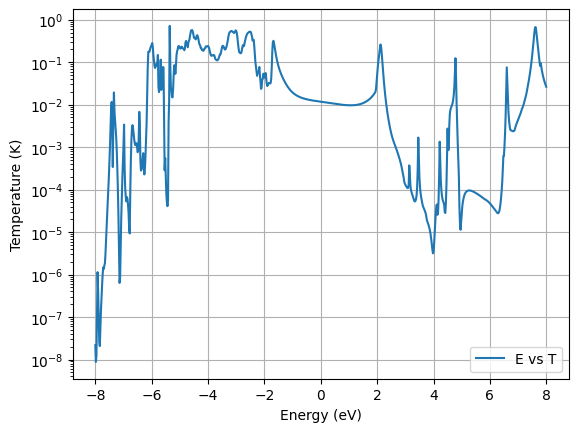

In [13]:
E,T = np.load('output/lowdin/ed/ET_ref.npy')
plt.plot(E, T, label='E vs T')
plt.xlabel('Energy (eV)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.yscale('log')
plt.grid()